In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Scraping data from website

In [2]:
# Scraping data from Vietnamnet.vn
url = "https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/" 

In [3]:
temp_url = url + "02000001.html"
html = urlopen(temp_url)
print(html.headers)

Server: nginx
Date: Wed, 28 Dec 2022 22:53:55 GMT
Content-Type: text/html
Transfer-Encoding: chunked
Connection: close
ETag: W/"133167415898430594"
IsCache: 0-1_%2fgiao-duc%2fdiem-thi%2ftra-cuu-diem-thi-tot-nghiep-thpt%2f2022%2f02000001.html_Desktop_False
X-Cache-Status: STALE
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
Cache-Control: private




In [4]:
# Detailed html file
Read = html.read()
print(Read)

b'<!DOCTYPE html>\r\n<html lang="vi" translate="no">\r\n    <head>\r\n        <meta charset="UTF-8">\r\n        <meta name="format-detection" content="telephone=no">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n        <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\r\n        <title>Chi ti\xe1\xba\xbft \xc4\x91i\xe1\xbb\x83m thi t\xe1\xbb\x91t nghi\xe1\xbb\x87p THPT n\xc4\x83m 2022 c\xe1\xbb\xa7a s\xe1\xbb\x91 b\xc3\xa1o danh 02000001</title>\r\n        <meta name="google" content="notranslate"/>\r\n        <meta name="description" content="Chi ti\xe1\xba\xbft \xc4\x91i\xe1\xbb\x83m thi t\xe1\xbb\x91t nghi\xe1\xbb\x87p THPT n\xc4\x83m 2022 c\xe1\xbb\xa7a s\xe1\xbb\x91 b\xc3\xa1o danh 02000001 ch\xc3\xadnh x\xc3\xa1c nh\xe1\xba\xa5t tr\xc3\xaan b\xc3\xa1o VietNamNet." />\r\n        <meta name="keywords" content="tra c\xe1\xbb\xa9u \xc4\x91i\xe1\xbb\x83m thi, tra cuu diem thi, diem thi, tra cuu diem chuan, tra c\xe1\xbb\xa9u \

In [5]:
# Using BeautifulSoup library to parse html file
soup = BeautifulSoup(Read, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="vi" translate="no">
<head>
<meta charset="utf-8">
<meta content="telephone=no" name="format-detection">
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport">
<title>Chi tiết điểm thi tốt nghiệp THPT năm 2022 của số báo danh 02000001</title>
<meta content="notranslate" name="google"/>
<meta content="Chi tiết điểm thi tốt nghiệp THPT năm 2022 của số báo danh 02000001 chính xác nhất trên báo VietNamNet." name="description"/>
<meta content="tra cứu điểm thi, tra cuu diem thi, diem thi, tra cuu diem chuan, tra cứu điểm chuẩn, 02000001" name="keywords"/>
<meta content="tra cứu điểm thi, tra cuu diem thi, diem thi, tra cuu diem chuan, tra cứu điểm chuẩn, 02000001" name="news_keywords"/>
<link href="https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html" media="handheld" rel="alternate"/>
<link href="https://vietnamnet.vn/giao-duc/diem-thi/tra-

In [6]:
# Build the function to parse web from given url
def Parse_web(url):
    try:
        html = urlopen(url).read()
        soup = BeautifulSoup(html, "html.parser")
        tags = soup("td")
        s = []
        for tag in tags:
            newline = str(tag.contents[0]).replace("\n", "").replace("\t", "")
            s.append(newline)
        return s
    except:
        return None

In [7]:
# Example for a student whose id is 02000001
student = Parse_web(temp_url)
print(student)

['Toán', '7.4', 'Lí', '7.75', 'Hóa', '7.25', 'Sinh', '5.5', 'Văn', '7.25', 'Ngoại ngữ', '9.8']


# Create a dataframe

In [8]:
# Create a dataframe with student id and all scores
def Add_value_into_DataFrame(root_url, start_id, end_id):
    # Default empty dataframe
    DataFrame = pd.DataFrame(columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"])
    
    province_id = start_id[0:1]
    province_id = process_id(int(province_id))
    
    for i in range(int(start_id), int(end_id) + 1):
        dict ={"ID": None,
            "Toán": None,
            "Lí": None,
            "Hóa": None,
            "Sinh": None,
            "Ngoại ngữ": None,
            "Văn": None,
            "GDCD": None,
            "Địa": None,
            "Sử": None
        }
        id = province_id + str(i)
        dict["ID"] = id
        url = root_url + id + ".html"
        print(url)
        s = Parse_web(url)
        
        if ( s != None):
            size = len(s)
            for j in range(size):
                if (j % 2 == 0):
                    dict[s[j]] = float(s[j + 1])  
            DataFrame.loc[len(DataFrame.index)] = dict
    DataFrame.columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
    DataFrame.index += 1
    return DataFrame
def process_id(id):
    if id < 10:
        return "0"
    return ""


In [9]:
DataFrame = Add_value_into_DataFrame(url, "02000001", "02000010")
print(DataFrame)

https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000002.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000003.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000004.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000005.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000006.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000007.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000008.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000009.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000010.html
          ID  Toán    Lí   Hóa  Sinh   Văn  Ngoại ngữ  GDCD   Địa    Sử
1   0200

In [10]:
DataFrame.to_csv("result_example.csv")

# Load available data

In [11]:
# Load the available data into DataFrame  
dataframe2020 = pd.read_csv("2020.csv", index_col = False, dtype = {'ID': 'str'})
dataframe2020.Name = "2020"
dataframe2021 = pd.read_csv("2021.csv", index_col = False, dtype = {'ID': 'str'})
dataframe2021.Name = "2021"
dataframe2022 = pd.read_csv("2022.csv", index_col = False, dtype = {'ID': 'str'})
dataframe2022.Name = "2022"


print(dataframe2022)

       Unnamed: 0        ID  Toán    Lí   Hóa  Sinh   Văn  Ngoại ngữ  GDCD  \
0               1  02000001   7.4  7.75  7.25  5.50  7.25        9.8   NaN   
1               2  02000002   8.4  7.50  6.00  4.50  7.50        9.4   NaN   
2               3  02000003   8.4  6.50  7.00  4.50  6.50        4.2   NaN   
3               4  02000004   8.8  8.25  5.25  6.00  5.50        8.8   NaN   
4               5  02000005   7.2   NaN   NaN   NaN  7.25        9.4  7.50   
...           ...       ...   ...   ...   ...   ...   ...        ...   ...   
84591       84592  02085083   6.4  6.50  5.75  4.75  6.50        4.0   NaN   
84592       84593  02085084   5.8   NaN   NaN   NaN  6.50        4.8  9.25   
84593       84594  02085085   7.6   NaN   NaN   NaN  6.25        6.6  8.75   
84594       84595  02085086   5.8   NaN   NaN   NaN  5.00        NaN   NaN   
84595       84596  02085088   NaN   NaN   NaN   NaN  5.25        NaN   NaN   

        Địa    Sử  
0       NaN   NaN  
1       NaN   NaN  
2  

# Data Statistics

In [12]:
dataframe2022.iloc[:, 2:].describe()

,Toán,Lí,Hóa,Sinh,Văn,Ngoại ngữ,GDCD,Địa,Sử
count,84094.000000,46752.000000,47182.000000,46804.000000,83072.000000,73249.000000,29545.000000,36217.000000,36476.000000
mean,7.057077,6.467969,6.591868,4.987090,6.340630,6.396445,8.201075,6.741903,6.450351
std,1.246951,1.353473,1.497060,1.433235,1.042226,1.891149,0.896812,1.062059,1.484106
min,1.000000,0.000000,0.000000,0.000000,0.250000,0.800000,0.000000,0.000000,1.000000
25%,6.400000,5.500000,5.500000,4.000000,5.750000,5.000000,7.750000,6.000000,5.500000
50%,7.200000,6.500000,6.750000,4.750000,6.500000,6.600000,8.250000,6.750000,6.500000
75%,8.000000,7.500000,7.750000,5.750000,7.000000,8.000000,8.750000,7.500000,7.500000
max,10.000000,10.000000,10.000000,10.000000,9.250000,10.000000,10.000000,10.000000,10.000000


In [13]:
dataframe2022[dataframe2022["Lí"] >= 0].iloc[:, 2:]

,Toán,Lí,Hóa,Sinh,Văn,Ngoại ngữ,GDCD,Địa,Sử
0,7.4,7.75,7.25,5.50,7.25,9.8,NaN,NaN,NaN
1,8.4,7.50,6.00,4.50,7.50,9.4,NaN,NaN,NaN
2,8.4,6.50,7.00,4.50,6.50,4.2,NaN,NaN,NaN
3,8.8,8.25,5.25,6.00,5.50,8.8,NaN,NaN,NaN
5,8.2,7.00,6.25,3.75,6.50,8.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
84575,7.0,5.50,5.25,4.50,5.25,NaN,NaN,NaN,NaN
84577,7.0,6.25,6.25,5.00,5.92,7.2,NaN,NaN,NaN
84584,8.8,4.75,6.75,6.50,5.50,9.0,NaN,NaN,NaN
84588,8.0,7.25,8.00,6.75,6.50,8.2,NaN,NaN,NaN


# Data Visualization

In [14]:
import matplotlib.pyplot as plt

In [15]:
# Define PiePlot function to draw a pie chart representing the number of students participating in the competition.
def PiePlot(list_subject, dataframe):
    y = []
    for index in range(len(list_subject)):
        len_sub = CountStudentOfSubject(list_subject[index], dataframe)
        y.append(len_sub)
    plt.figure(figsize = (20, 10))
    plt.pie(y, labels = list_subject, autopct='%1.0f%%', shadow=True)
    plt.title(label ="Biểu đồ hình tròn thể hiện số lượng thí sinh tham gia thi các môn năm {}.".format(int(dataframe.Name)), 
              fontsize = 20, color = "green")
    
def CountStudentOfSubject(subject,dataframe):
    subject = str(subject)
    df = dataframe.loc[dataframe[subject] >= 0]
    df = df[subject].array
    return len(df)

<Figure size 432x288 with 0 Axes>

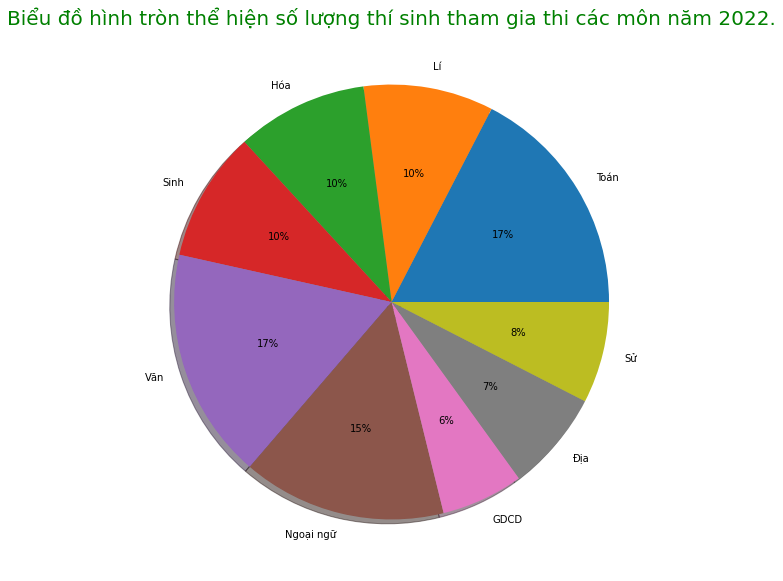

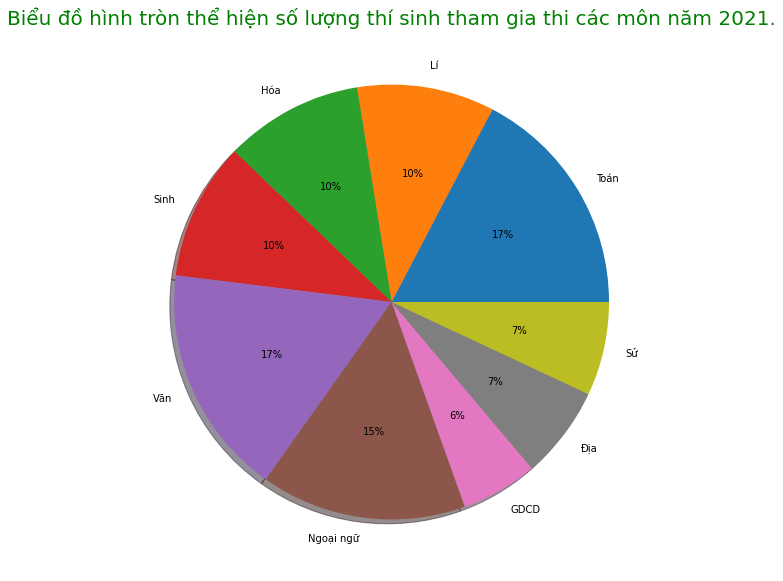

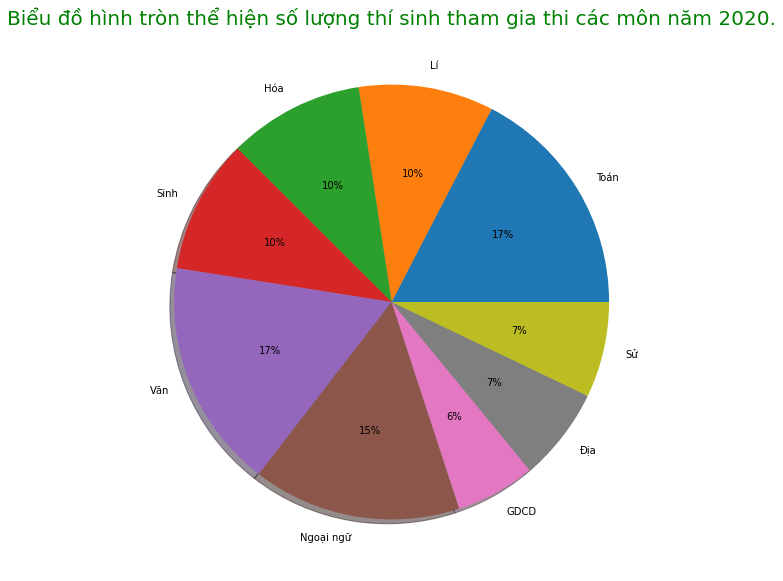

In [16]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
plt.figure()
PiePlot(list_subject, dataframe2022)
PiePlot(list_subject, dataframe2021)
PiePlot(list_subject, dataframe2020)

In [17]:
def BarPlot(subject, dataframe):
    # if the subject is "Toan" or "Ngoai ngu", score will be 0.2
    score_02 = ["Toán", "Ngoại ngữ"]
    
    if subject in score_02:
        default_score = {str(i/5): 0 for i in range(0, 51)}
    elif  subject == "Văn":
        dataframe_temp = dataframe[dataframe[subject] >= 0]
        Van_score = sorted(set(dataframe_temp[subject]))
        print(Van_score)
        default_score = {str(score): 0 for score in Van_score} 
        default_score["0"] = 0
        default_score["10"] = 0
    else:
        default_score = {str(i/4): 0 for i in range(0, 41)}
        
    df = dataframe.loc[dataframe[subject] >= 0][subject].array
    for i in df:
        default_score[str(i)] += 1
    labels = list(default_score.keys())
    y = list(default_score.values())
    
    plt.figure(figsize=[25, 15])
    rects1 = plt.bar(labels, y, 0.8, label = subject)
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() - 0.1, bar.get_height()+20), fontsize = 10)
    plt.xlabel('Điểm.', fontsize = 20)
    plt.ylabel('Số lượng học sinh.', fontsize = 20)
    plt.title("Biểu đồ phổ điểm thi THPT môn " + subject + " "+ str(dataframe.Name), fontsize = 30)
    plt.show()

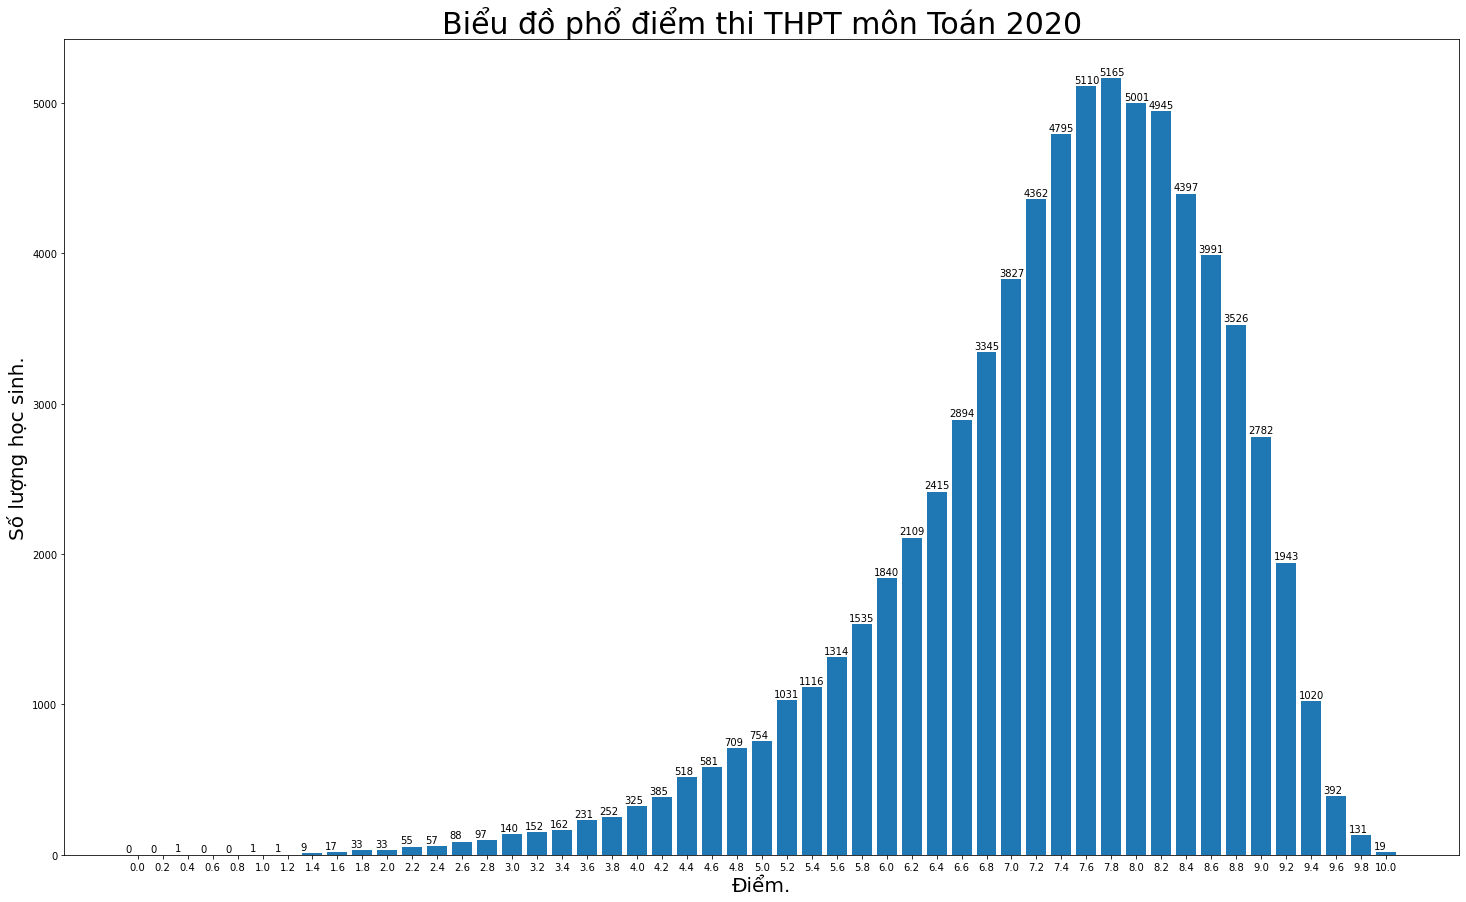

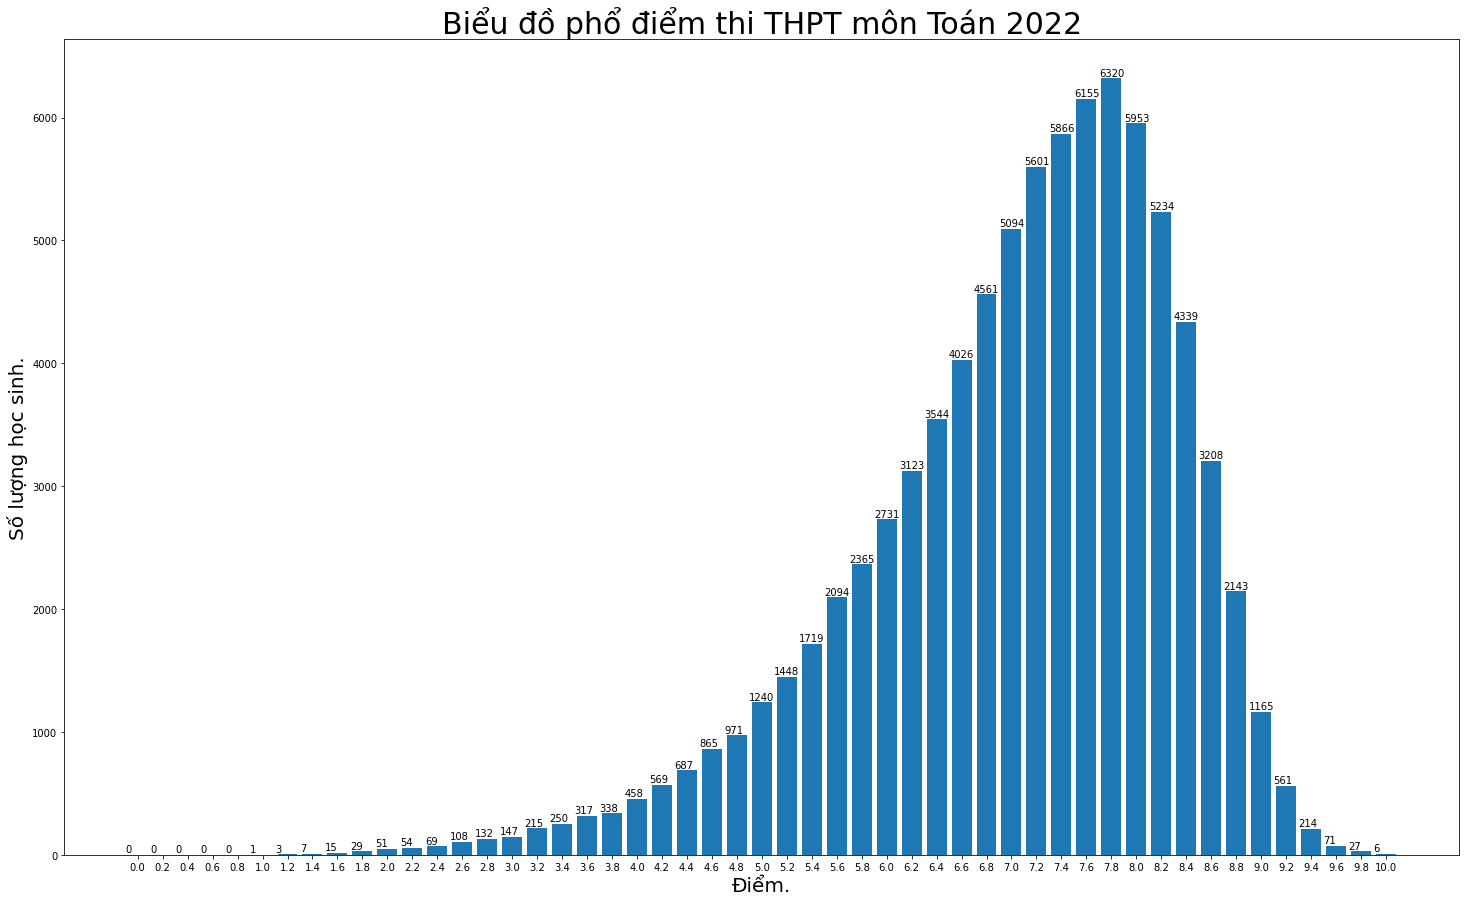

In [18]:
BarPlot("Toán", dataframe2020)
BarPlot("Toán", dataframe2022)


In [19]:
# mean score of subjects
def MeanPlot(list_subject, dataframe):
    y_mean = []
    for subject in list_subject:
        y_mean.append(round(dataframe.loc[dataframe[subject] >= 0][subject].mean(axis =0), 3))
    plt.figure(figsize=[16, 7])
    rects1 = plt.bar(list_subject, y_mean, 0.6, label = "Toan")
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.1, bar.get_height()+ 0.1), fontsize = 10)
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các môn thi THPT năm 2022.", fontsize = 25)
    plt.show()

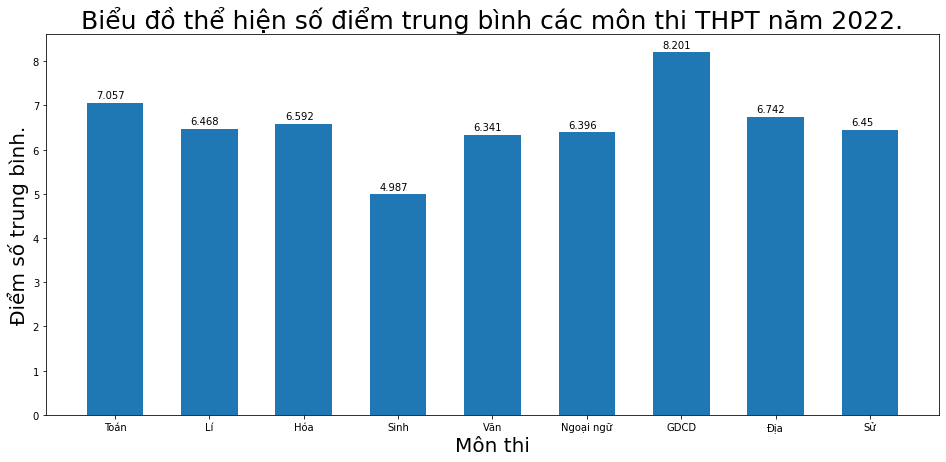

In [20]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
MeanPlot(list_subject, dataframe2022)

### Comparing special score 10 or <= 1 of a year.

In [21]:
def SpecialScoreChart(list_subject, dataframe, type):
    count_score = {subject : 0 for subject in list_subject}
    for subject in list_subject:
        if type == "maximum":
            count_score[subject] = len(dataframe[dataframe[subject] == 10])
        if type == "paralysis":
            subdataframe = dataframe[dataframe[subject] >= 0]
            count_score[subject] = len(subdataframe[ subdataframe[subject] <= 1])
    plt.figure(figsize=[16, 7])
    rects1 = plt.bar(count_score.keys(), count_score.values(), 0.6, label = "Toan")
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.2, bar.get_height()+ 0.1), fontsize = 15)
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Số điểm 10.", fontsize = 20)
    if type == "maximum":
        plt.title("Biểu đồ thể hiện số điểm 10 các môn thi THPT năm 2022.", fontsize = 25)
        plt.ylabel("Số điểm 10.", fontsize = 20)
    else:
        plt.title("Biểu đồ thể hiện số điểm liệt các môn thi THPT năm 2022.", fontsize = 25)
        plt.ylabel("Số điểm liệt.", fontsize = 20)
    plt.show()

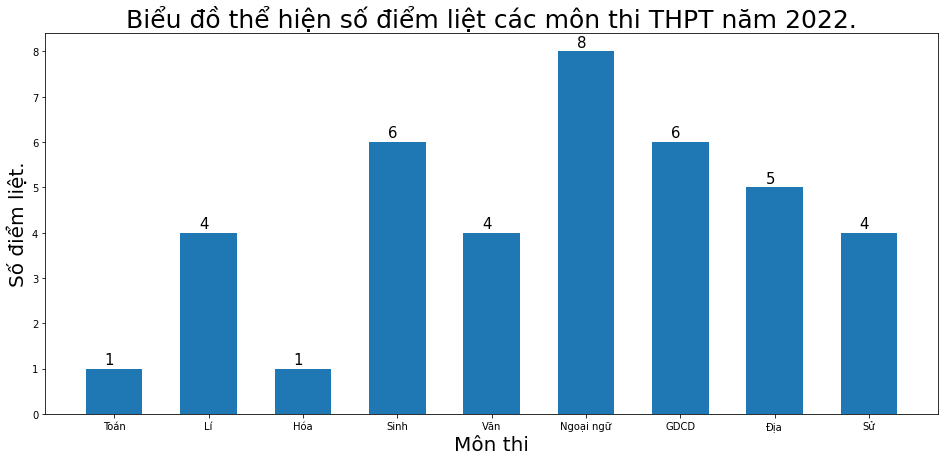

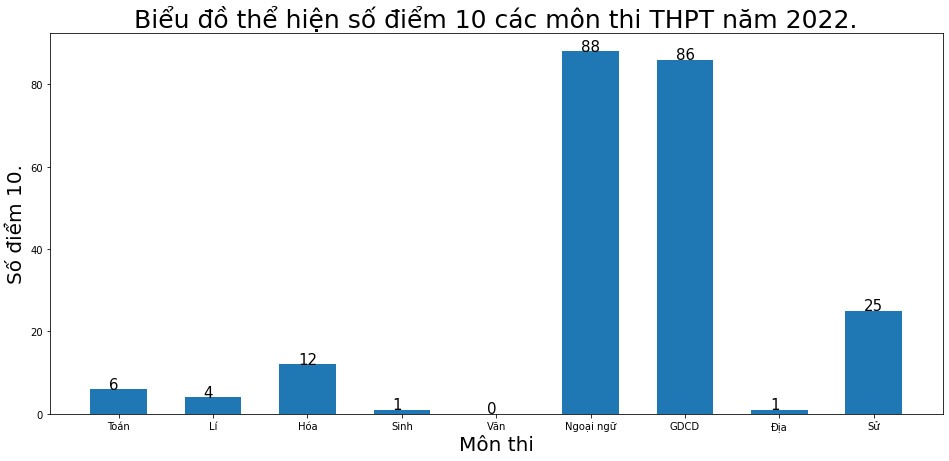

In [22]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
SpecialScoreChart(list_subject, dataframe2022, type = "paralysis")
SpecialScoreChart(list_subject, dataframe2022, type = "maximum")


### Mean score of blocks in a year

In [23]:
def set_location(MeanBlock):
    location = []
    j = 0
    for i in range(4*len(MeanBlock.keys())):
        if (i > 0 and i % 4 == 0):
            j = location[i - 1] +3   
        location.append(j)
        j += 1
    label = []
    for block in MeanBlock.keys():
        meansubject = MeanBlock[block][1]
        for subject in meansubject.keys():
            label.append(subject)
        label.append(block)
        
    return location, label
    
# subject of block = { A: ["Toan", "Li", "Hoa"],...} is a dictionary.
def MeanBlockChart(blocksubject, dataframe):
    MeanBlock = {block: [] for block in blocksubject.keys()}
    for block in blocksubject.keys():
        subdataframe = dataframe[blocksubject[block]]
        for subject in blocksubject[block]:
            subdataframe = subdataframe[subdataframe[subject]  >= 0]
            
        MeanSubject = round(subdataframe.mean(), 3)
        MeanBlock[block].append(round(subdataframe.mean().mean(), 3))
        MeanBlock[block].append(MeanSubject)
     
    plt.figure(figsize=[16, 7])
    width = 1
    index = 0
    color = ["red", "green", "orange", "blue"]
    location, label = set_location(MeanBlock)
    y = []
    list_color = []
    
    for block in MeanBlock.keys():
        mean_subject = MeanBlock[block][1]
        i = 0
        for subject in mean_subject.keys(): 
            y.append(mean_subject[subject])
            list_color.append(color[i])
            i +=1 
        y.append(MeanBlock[block][0])
        list_color.append(color[i])

    rects1 = plt.bar(location, y, width, label = subject, color = list_color) 
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.1 , bar.get_height()+ 0.1), fontsize = 10)
        
    plt.xticks(location, label, fontsize = 10)      
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các môn và khối thi THPT năm 2022.", fontsize = 25) 
    # plt.legend()
    plt.show()
    pass 

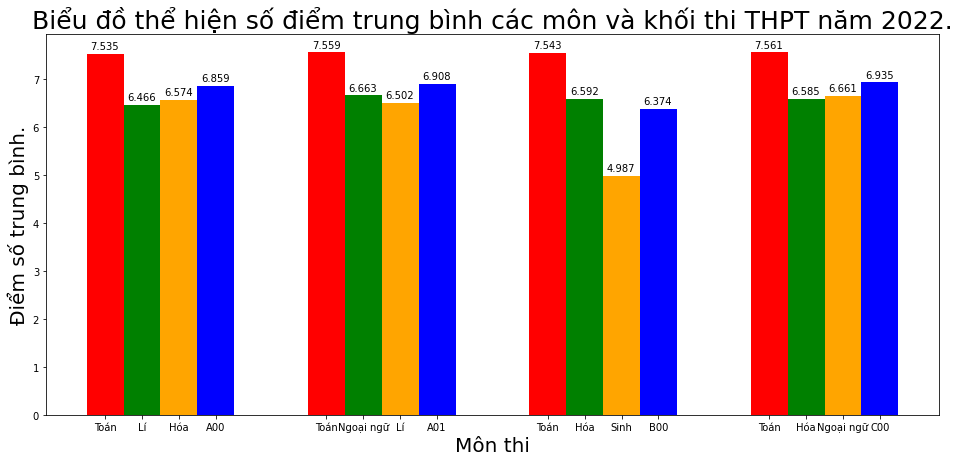

In [24]:
a = MeanBlockChart({'A00': ["Toán", "Lí", "Hóa"], "A01": ["Toán", "Ngoại ngữ", "Lí"], "B00": ["Toán", "Hóa", "Sinh"], "C00": ["Toán", "Hóa", "Ngoại ngữ"]}, dataframe2022)

### Comparing special score 10 or <= 1 over three years.

In [25]:
# Plot clustered bar chart
def SetLocation_Label(subjects, years):
    list_color = ['green', 'red', 'blue', 'orange', 'yellow']
    sizeofsubject = len(subjects)
    numberofyear = len(years)
    location = []
    label = []
    color = []
    j = 0
    c = 0
    for i in range(numberofyear*sizeofsubject):
        if ( i > 0 and i % numberofyear == 0):
            j = location[i - 1] + 3
            c = 0
        location.append(j)
        color.append(list_color[c])
        label.append(years[c])
        c += 1
        j += 1
    
    return location, label, color



def MeanSubject3Years_about_special_sroce(list_dataframe, list_subject, type):
    
    list_years = [dataframe.Name for dataframe in list_dataframe]
    Location, Label, Color = SetLocation_Label(list_subject, list_years)
    Y = []
    y_ticks = [Location[i] for i in range(len(Location)) if i % len(list_years) == 0]

    for subject in list_subject:
        for dataframe in list_dataframe:
            if type == "maximum":
                count_score = len(dataframe[dataframe[subject] >= 9])
                Y.append(count_score)
            if type == "paralysis":
                subdataframe = dataframe[dataframe[subject] >= 0]
                count_score = len(subdataframe[ subdataframe[subject] <= 1])
                Y.append(count_score)
    plt.figure(figsize=[20, 10])
    width = 1

    for index in range(len(Location)):
        rects = plt.bar(Location[index], Y[index], width, label = Label[index] ,color = Color[index] )   
        plt.bar_label(rects, padding = 2)
        
    plt.xlabel("Môn thi", fontsize = 20)

    if type == "maximum":
        plt.title("Biểu đồ thể hiện số điểm 10 các môn thi THPT qua các năm.", fontsize = 25)
        plt.ylabel("Số điểm 10.", fontsize = 20)
    else:
        plt.title("Biểu đồ thể hiện số điểm liệt các môn thi THPT qua các năm.", fontsize = 25)
        plt.ylabel("Số điểm liệt.", fontsize = 20)
    plt.xticks(y_ticks, list_subject)
    plt.legend(list_years)
    
    plt.show()
    pass
    

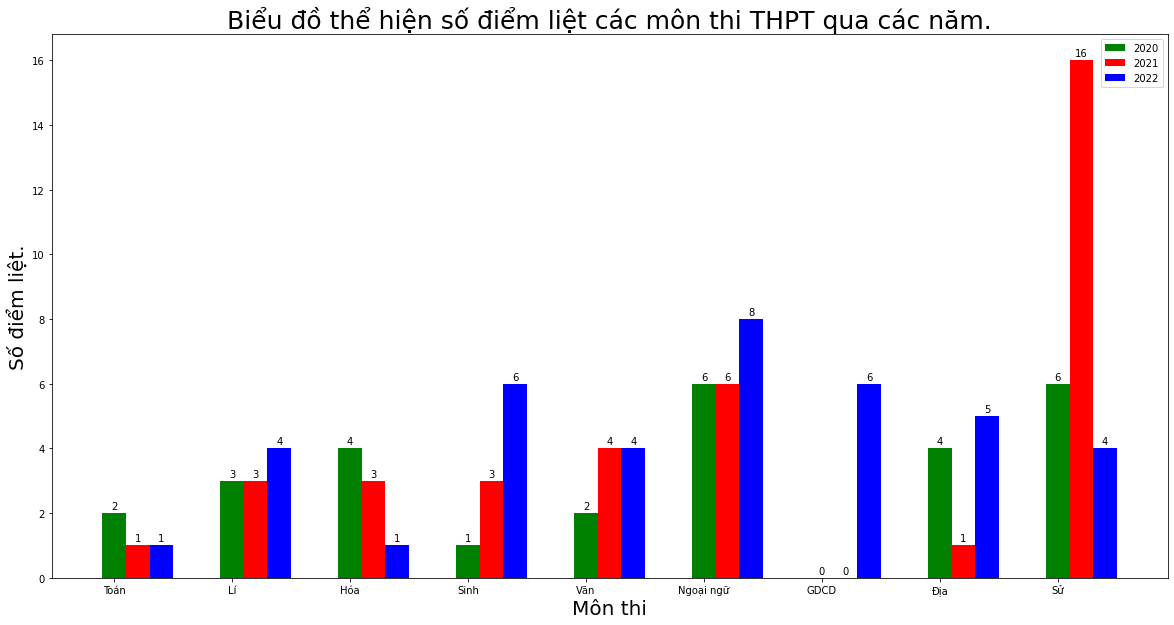

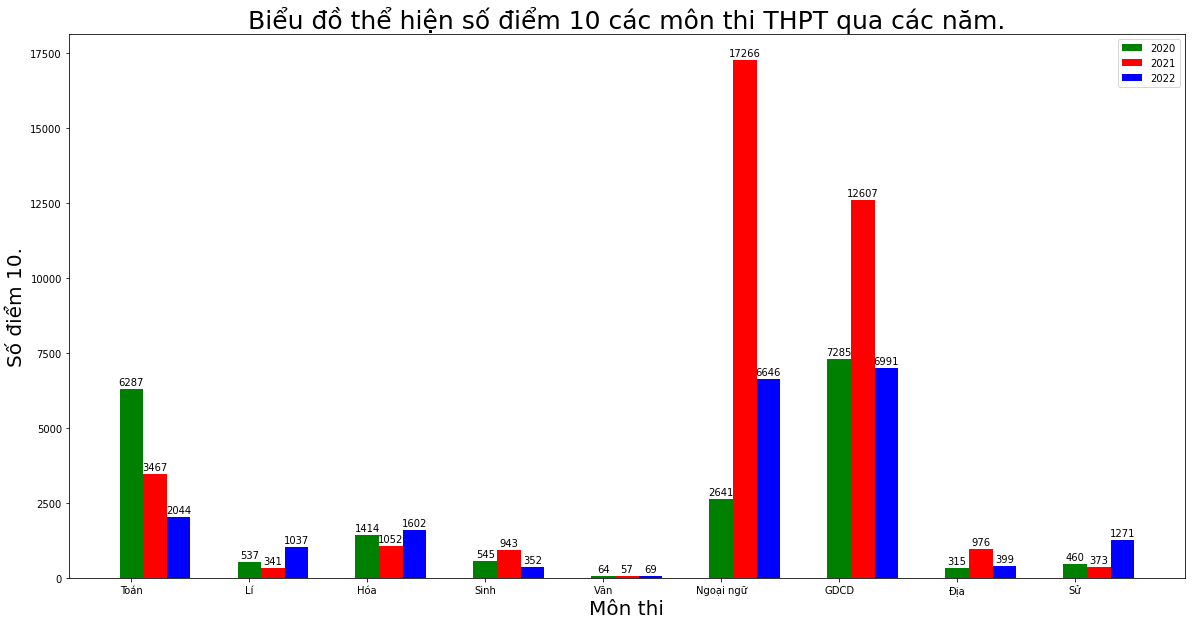

In [26]:
MeanSubject3Years_about_special_sroce([dataframe2020, dataframe2021, dataframe2022], list_subject, type = "paralysis")
MeanSubject3Years_about_special_sroce([dataframe2020, dataframe2021, dataframe2022], list_subject, type = "maximum")

### Comparing average score of subjecs over three years.

In [27]:
# Compare the average score of the subjects over the years
def MeanScoreOfSubjectsOverYears(dataframelist, subjectlist):
    Average_score = {name.Name:  {subject: 0}  for name in dataframelist for subject in subjectlist}
    for dataframe in dataframelist:
        for subject in subjectlist:
            subdataframe = dataframe[dataframe[subject] >= 0].mean()
            Average_score[dataframe.Name][subject] = subdataframe[subject]
            
    list_years = [dataframe.Name for dataframe in dataframelist]
    Location, Label, Color = SetLocation_Label(subjectlist, list_years)
    Y = []
    y_ticks = [Location[i] for i in range(len(Location)) if i % len(list_years) == 0]
    
    for subject in subjectlist:
        for year in list_years:
            Y.append(round(Average_score[year][subject], 2))
    plt.figure(figsize=[20, 10])
    width = 1

    for index in range(len(Location)):
        rects = plt.bar(Location[index], Y[index], width, label = Label[index] ,color = Color[index] )   
        plt.bar_label(rects, padding = 2)
            
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các môn thi THPT qua các năm.", fontsize = 25) 
    plt.xticks(y_ticks, list_subject)
    plt.legend(list_years)
    
    plt.show()
    pass

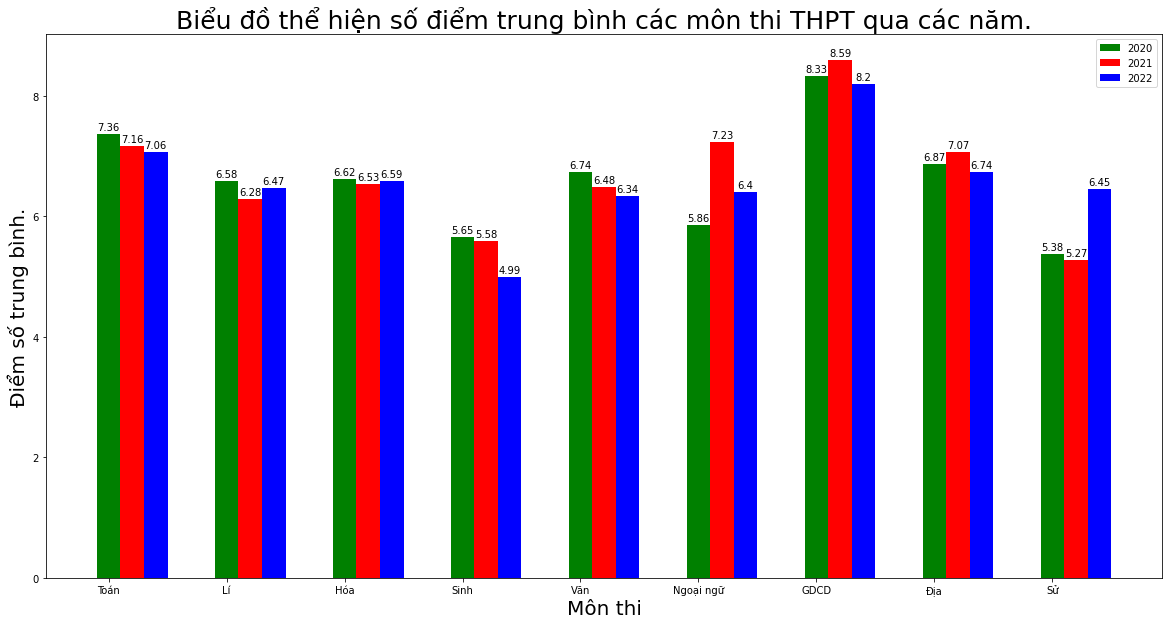

In [28]:
MeanScoreOfSubjectsOverYears([dataframe2020, dataframe2021, dataframe2022], ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"])

### Comparing average score of blocks over three years.

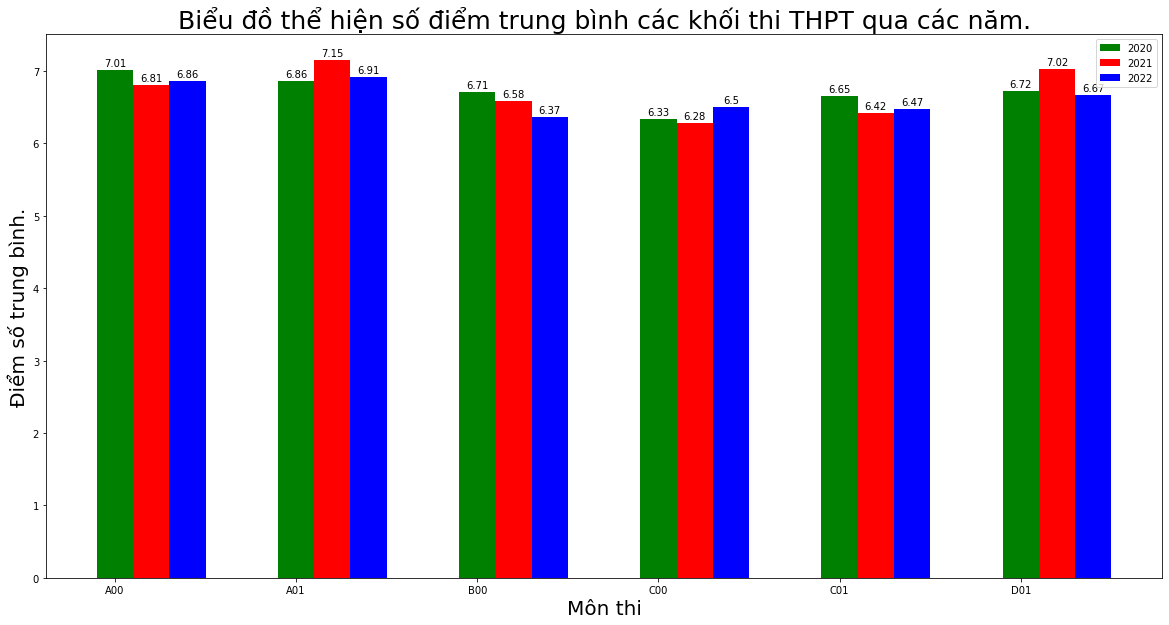

In [29]:
# Compare the average score of the blocks over the years.
def MeanScoreOfBlocksOverYears(dataframelist, blocklist):
    Average_score = {dataframe.Name : {block: 0} for dataframe in dataframelist for block in blocklist.keys()}
    for dataframe in dataframelist:
        for block in blocklist.keys():
            subdataframe = dataframe[blocklist[block]]
            for subject in blocklist[block]:
                subdataframe = subdataframe[subdataframe[subject] >= 0]
            Average_score[dataframe.Name][block] = subdataframe.mean().mean()
            
    list_years = [dataframe.Name for dataframe in dataframelist]
    Location, Label, Color = SetLocation_Label(blocklist, list_years)
    Y = []
    y_ticks = [Location[i] for i in range(len(Location)) if i % len(list_years) == 0]
    
    for block in blocklist:
        for year in list_years:
            Y.append(round(Average_score[year][block], 2))
            
            
    plt.figure(figsize=[20, 10])
    width = 1

    for index in range(len(Location)):
        rects = plt.bar(Location[index], Y[index], width, label = Label[index] ,color = Color[index] )   
        plt.bar_label(rects, padding = 2)
            
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các khối thi THPT qua các năm.", fontsize = 25) 
    plt.xticks(y_ticks, blocklist)
    plt.legend(list_years)
    
    plt.show()
            
    


blocklist = {"A00": ["Toán", "Lí", "Hóa"],
             "A01": ["Toán", "Lí", "Ngoại ngữ"],
             "B00": ["Toán", "Hóa", "Sinh"],
             "C00": ["Văn", "Sử", "Địa"],
             "C01": ["Văn", "Hóa", "Lí"],
             "D01": ["Toán", "Văn", "Ngoại ngữ"]
             }
MeanScoreOfBlocksOverYears([dataframe2020, dataframe2021, dataframe2022], blocklist) 


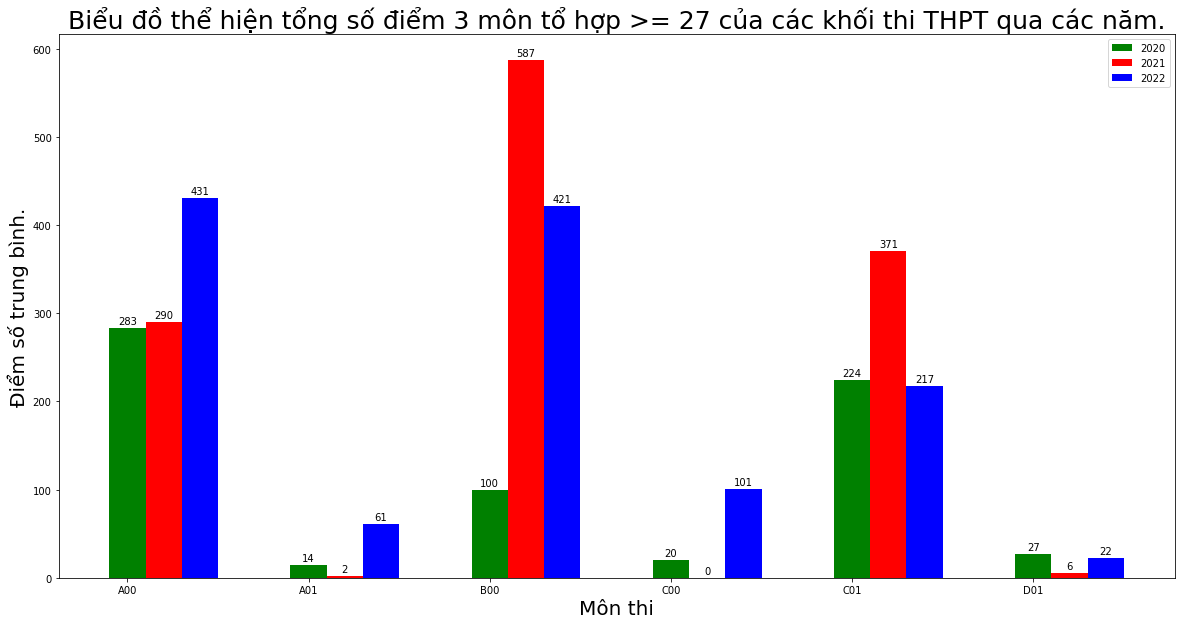

In [49]:
# Students whose score is more than equal 27. 
def ScoreMoreThanScore(dataframelist, score, blocks_list):
    list_years = [dataframe.Name for dataframe in dataframelist]
    Location, Label, Color = SetLocation_Label(blocklist, list_years)
    Y = []
    y_ticks = [Location[i] for i in range(len(Location)) if i % len(list_years) == 0]
    
    Count_score = {dataframe.Name : {block: 0} for dataframe in dataframelist for block in blocklist.keys()}
    for dataframe in dataframelist:
        for block in blocklist.keys():
            subdataframe = dataframe[blocklist[block]]
            for subject in blocklist[block]:
                subdataframe = subdataframe[subdataframe[subject] >= 0]
            count = 0
            for i in range(len(subdataframe.index)):
                if (sum(subdataframe.iloc[i, :]) >= score):
                    count += 1
            Count_score[dataframe.Name][block] = count 
            Y.append(count)
            
       
    plt.figure(figsize=[20, 10])
    width = 1
    for index in range(len(Location)):
        rects = plt.bar(Location[index], Y[index], width, label = Label[index] ,color = Color[index] )   
        plt.bar_label(rects, padding = 2)
            
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện tổng số điểm 3 môn tổ hợp >= {} của các khối thi THPT qua các năm.".format(score), fontsize = 25) 
    plt.xticks(y_ticks, blocklist)
    plt.legend(list_years)
    
    plt.show()
ScoreMoreThanScore([dataframe2020, dataframe2021, dataframe2022],27, blocklist)

# Predict score board 2020 from 2020 and 2021 with using Polynomial Regression of sklean library

In [30]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


[[1.0000000e+00 6.6000000e+00 4.3560000e+01 2.8749600e+02 1.8974736e+03]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03]
 [1.0000000e+00 9.2000000e+00 8.4640000e+01 7.7868800e+02 7.1639296e+03]
 [1.0000000e+00 2.6000000e+00 6.7600000e+00 1.7576000e+01 4.5697600e+01]
 [1.0000000e+00 5.8000000e+00 3.3640000e+01 1.9511200e+02 1.1316496e+03]
 [1.0000000e+00 2.4000000e+00 5.7600000e+00 1.3824000e+01 3.3177600e+01]
 [1.0000000e+00 5.4000000e+00 2.9160000e+01 1.5746400e+02 8.5030560e+02]
 [1.0000000e+00 6.0000000e+00 3.6000000e+01 2.1600000e+02 1.2960000e+03]
 [1.0000000e+00 3.6000000e+00 1.2960000e+01 4.6656000e+01 1.6796160e+02]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01 8.1000000e+01]
 [1.0000000e+00 3.8000000e+00 1.4440000e+01 5.4872000e+01 2.0851360e+02]
 [1.0000000e+00 2.4000000e+00 5.7600000e+00 1.3824000e+01 3.3177600e+01]
 [1.0000000e+00 1.8000000e+00 3.2400000e+00 5.8320000e+00 1.0497600e+01]
 [1.0000000e+00 8.4000000e+00 7.0560000e+01 5.92704

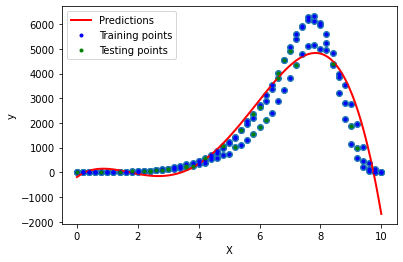

In [31]:
# get x: score, y = number of score of a subject.
def GetX_Y(dataframe, subject):
    score_02 = ["Toán", "Ngoại ngữ"]
    if subject in score_02:
        default_score = {str(i/5): 0 for i in range(0, 51)}
    elif  subject == "Văn":
        dataframe_temp = dataframe[dataframe[subject] >= 0]
        Van_score = sorted(set(dataframe_temp[subject]))
        print(Van_score)
        default_score = {str(score): 0 for score in Van_score} 
        default_score["0"] = 0
        default_score["10"] = 0
    else:
        default_score = {str(i/4): 0 for i in range(0, 41)}
        
    df = dataframe.loc[dataframe[subject] >= 0][subject].array
    for i in df:
        default_score[str(i)] += 1
    return default_score
  
def Predict_Subject(dataframe1, dataframe2, dataframe3, subject):
    Score_1 = GetX_Y(dataframe1, subject= subject)
    Score_2 = GetX_Y(dataframe2, subject = subject)
    Score_3 = GetX_Y(dataframe3, subject = subject)
    
    
    x1 = [float(score) for score in Score_1.keys()]
    y1 = [amount for amount in Score_1.values()]
    x2 = [float(score) for score in Score_2.keys()]
    y2 = [amount for amount in Score_2.values()]
    x3 = [float(score) for score in Score_3.keys()]
    y3 = [amount for amount in Score_3.values()]
    # This is data (x, y) for training 
    X = x1 + x2 + x3
    Y = y1 + y2 + y3
    
    x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    plt.scatter(X, Y)
    
    poly = PolynomialFeatures(degree = 4, include_bias = True)
    x_train_trans = poly.fit_transform(np.array(x_train).reshape(-1, 1))
    x_test_trans = poly.fit_transform(np.array(x_test).reshape(-1, 1))
    
    print(x_test_trans)
    lr = LinearRegression()
    lr.intercept_ = 0
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)
    
    print(r2_score(y_test, y_pred))
    print("Hệ số hàm bậc 4 \n {}".format(lr.coef_[1:]))
    
    X_new = np.linspace(0, 10, 200).reshape(200, 1)
    X_new_poly = poly.transform(X_new)
    y_new = lr.predict(X_new_poly)
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
    plt.plot(x_train, y_train, "b.",label='Training points')
    plt.plot(x_test, y_test, "g.",label='Testing points')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return lr 

Ln = Predict_Subject(dataframe2020, dataframe2021, dataframe2022, "Toán")

c:\Users\QUOC BAO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


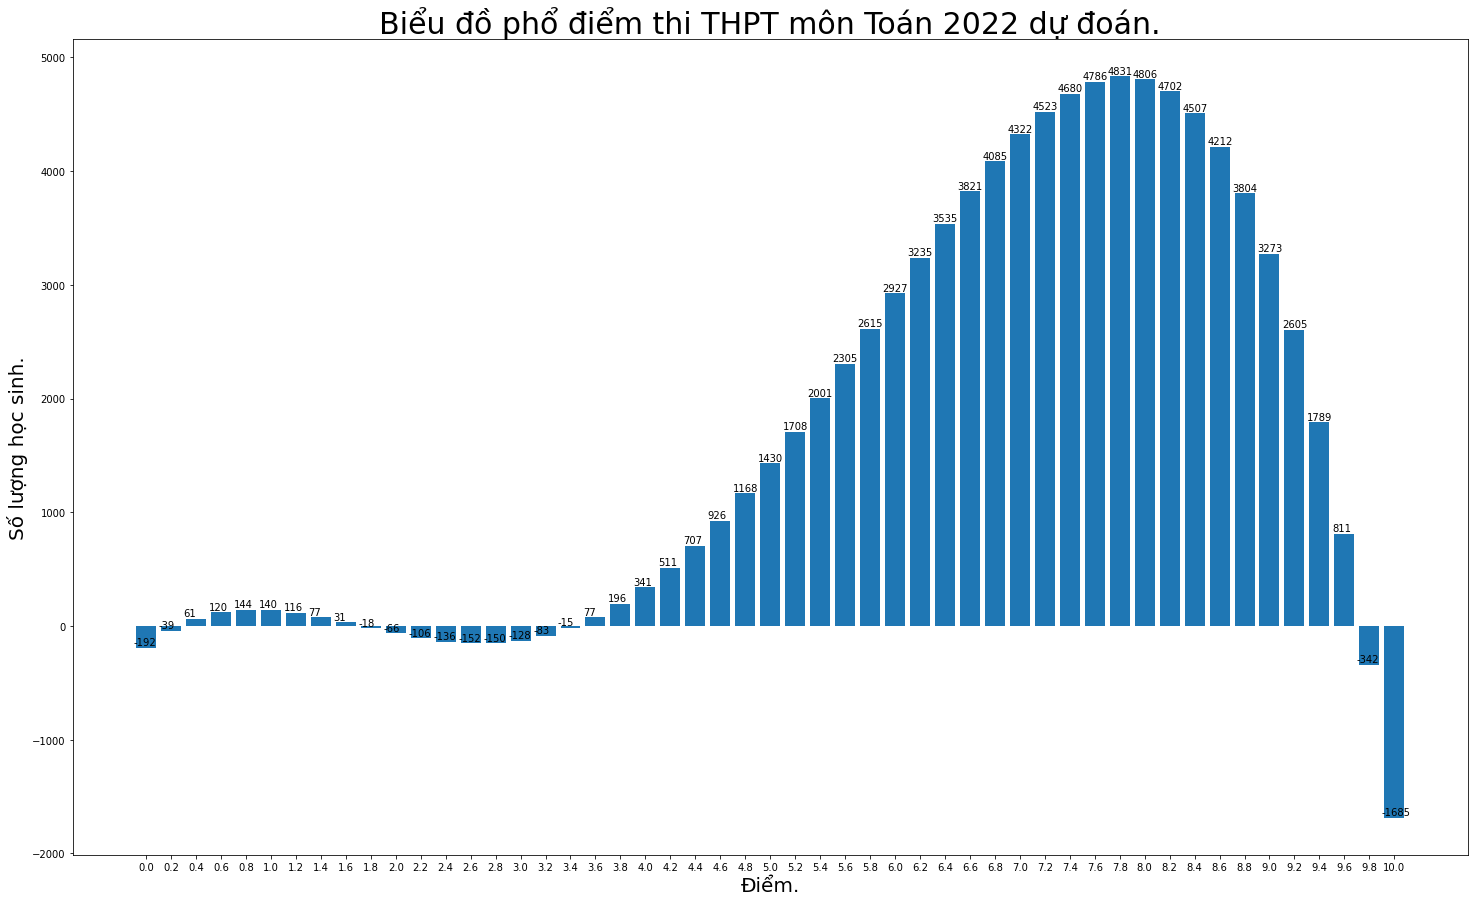

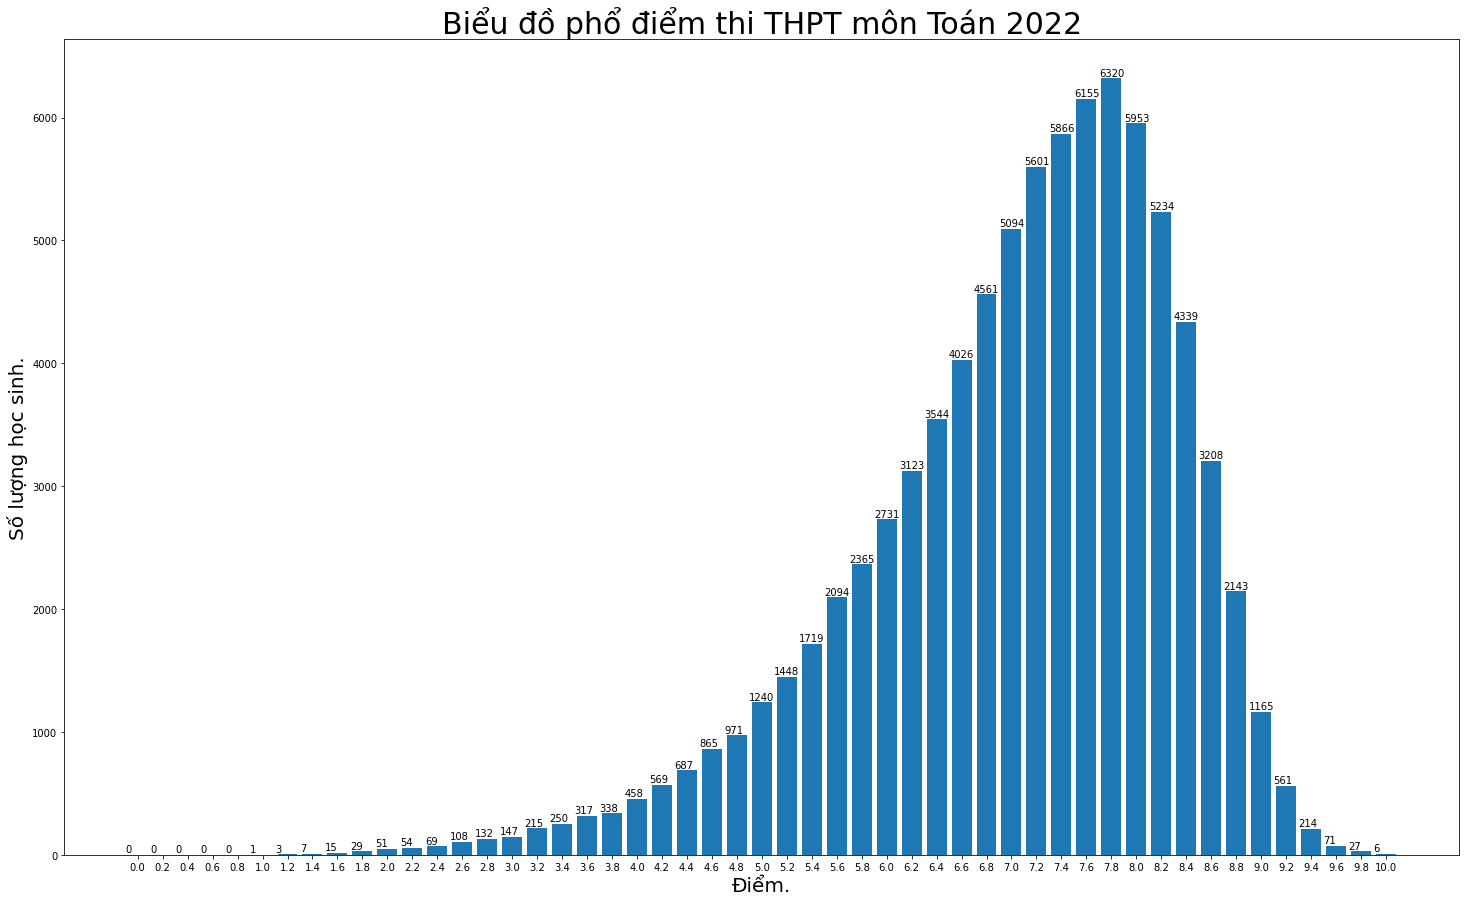

In [32]:
x = dataframe2022[dataframe2022["Toán"] >= 0]
X = [score for score in GetX_Y(dataframe2022, "Toán").keys()]
poly = PolynomialFeatures(degree = 4, include_bias = True)
x_new = poly.fit_transform(np.array(X).reshape(-1, 1))
y = Ln.predict(x_new)
plt.figure(figsize=[25, 15])
rects1 = plt.bar(X, y, 0.8)
for bar in rects1:
    plt.annotate(int(bar.get_height()), (bar.get_x() - 0.1, bar.get_height()+20), fontsize = 10)
plt.xlabel('Điểm.', fontsize = 20)
plt.ylabel('Số lượng học sinh.', fontsize = 20)
plt.title("Biểu đồ phổ điểm thi THPT môn Toán 2022 dự đoán.", fontsize = 30)
plt.show()

BarPlot("Toán", dataframe2022)